<a href="https://colab.research.google.com/github/Justin-Goodrich/Arial-Semantic-Image-Segmentation/blob/main/Arial_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

- basic imports and global variables

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import json

In [ ]:
DRIVE_DIR = 'drive/MyDrive'
DATASET_DIR = 'landcover.ai.v1'

# Download Dataset

Either copy from pre-downloaded dataset in google drive or download from wesbite and process data, the latter is reccomended

In [ ]:
try:
  shutil.copytree(os.path.join(DRIVE_DIR,DATASET_DIR), DATASET_DIR)
except:
  print('datset already exists')

In [ ]:
!wget -P landcover.ai.v1 https://landcover.ai.linuxpolska.com/download/landcover.ai.v1.zip
!unzip ./landcover.ai.v1/landcover.ai.v1.zip -d ./landcover.ai.v1

--2023-04-07 17:18:14--  https://landcover.ai.linuxpolska.com/download/landcover.ai.v1.zip
Resolving landcover.ai.linuxpolska.com (landcover.ai.linuxpolska.com)... 95.216.226.136
Connecting to landcover.ai.linuxpolska.com (landcover.ai.linuxpolska.com)|95.216.226.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1538212277 (1.4G) [application/zip]
Saving to: ‘landcover.ai.v1/landcover.ai.v1.zip’

landcover.ai.v1.zip 100%[===================>]   1.43G  22.7MB/s    in 65s     

2023-04-07 17:19:20 (22.4 MB/s) - ‘landcover.ai.v1/landcover.ai.v1.zip’ saved [1538212277/1538212277]

Archive:  ./landcover.ai.v1/landcover.ai.v1.zip
   creating: ./landcover.ai.v1/images/
  inflating: ./landcover.ai.v1/images/M-33-48-A-c-4-4.tif  
  inflating: ./landcover.ai.v1/images/M-33-20-D-c-4-2.tif  
  inflating: ./landcover.ai.v1/images/M-33-20-D-d-3-3.tif  
  inflating: ./landcover.ai.v1/images/M-33-32-B-b-4-4.tif  
  inflating: ./landcover.ai.v1/images/M-33-7-A-d-2-3.tif  
  

In [ ]:
import glob
import os

import cv2

IMGS_DIR = "./images"
MASKS_DIR = "./masks"
OUTPUT_DIR = "./output"

TARGET_SIZE = 512

img_paths = glob.glob(os.path.join(DATASET_DIR,IMGS_DIR, "*.tif"))
mask_paths = glob.glob(os.path.join(DATASET_DIR,MASKS_DIR, "*.tif"))

img_paths.sort()
mask_paths.sort()

os.makedirs(os.path.join(DATASET_DIR,OUTPUT_DIR))
for i, (img_path, mask_path) in enumerate(zip(img_paths, mask_paths)):
    img_filename = os.path.splitext(os.path.basename(img_path))[0]
    mask_filename = os.path.splitext(os.path.basename(mask_path))[0]
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)

    assert img_filename == mask_filename and img.shape[:2] == mask.shape[:2]

    k = 0
    for y in range(0, img.shape[0], TARGET_SIZE):
        for x in range(0, img.shape[1], TARGET_SIZE):
            img_tile = img[y:y + TARGET_SIZE, x:x + TARGET_SIZE]
            mask_tile = mask[y:y + TARGET_SIZE, x:x + TARGET_SIZE]
            if img_tile.shape[0] == TARGET_SIZE and img_tile.shape[1] == TARGET_SIZE:
                out_img_path = os.path.join(DATASET_DIR,OUTPUT_DIR, "{}_{}.jpg".format(img_filename, k))
                cv2.imwrite(out_img_path, img_tile)

                out_mask_path = os.path.join(DATASET_DIR,OUTPUT_DIR, "{}_{}_m.png".format(mask_filename, k))
                cv2.imwrite(out_mask_path, mask_tile)

            k += 1

    print("Processed {} {}/{}".format(img_filename, i + 1, len(img_paths)))


Processed M-33-20-D-c-4-2 1/41
Processed M-33-20-D-d-3-3 2/41
Processed M-33-32-B-b-4-4 3/41
Processed M-33-48-A-c-4-4 4/41
Processed M-33-7-A-d-2-3 5/41
Processed M-33-7-A-d-3-2 6/41
Processed M-34-32-B-a-4-3 7/41
Processed M-34-32-B-b-1-3 8/41
Processed M-34-5-D-d-4-2 9/41
Processed M-34-51-C-b-2-1 10/41
Processed M-34-51-C-d-4-1 11/41
Processed M-34-55-B-b-4-1 12/41
Processed M-34-56-A-b-1-4 13/41
Processed M-34-6-A-d-2-2 14/41
Processed M-34-65-D-a-4-4 15/41
Processed M-34-65-D-c-4-2 16/41
Processed M-34-65-D-d-4-1 17/41
Processed M-34-68-B-a-1-3 18/41
Processed M-34-77-B-c-2-3 19/41
Processed N-33-104-A-c-1-1 20/41
Processed N-33-119-C-c-3-3 21/41
Processed N-33-130-A-d-3-3 22/41
Processed N-33-130-A-d-4-4 23/41
Processed N-33-139-C-d-2-2 24/41
Processed N-33-139-C-d-2-4 25/41
Processed N-33-139-D-c-1-3 26/41
Processed N-33-60-D-c-4-2 27/41
Processed N-33-60-D-d-1-2 28/41
Processed N-33-96-D-d-1-1 29/41
Processed N-34-106-A-b-3-4 30/41
Processed N-34-106-A-c-1-3 31/41
Processed N-

# Data Preperation

for this project, I am using a landcover dataset called [LandCover.ai](https://landcover.ai.linuxpolska.com/).It includes several images taken in Poland and has 4 categories: buildings (1), woodland (2), water(3), and roads(4). I opted to create a data generator using the ``keras.utils.Sequence`` class. This is more memory efficient because it provides training data one batch at a time.




In [ ]:
def get_image(path, n_channels):
  img = tf.io.read_file(path)
  return tf.io.decode_image(img, channels = n_channels)

In [ ]:
def get_image_set(path):
  return (get_image(os.path.join(DATASET_DIR,'output/{}.jpg'.format(path)),3), get_image(os.path.join(dir,'{}_m.png'.format(path)),1),4)

In [ ]:
def process_images(path):
    dir = DATASET_DIR
    training = open(os.path.join(dir,path))
    features = []
    masks = []
    for i in training:
        jpgtensor = np.array(get_image(os.path.join(dir,'output','{}.jpg'.format(i.strip())),3))
        pngtensor = np.array(get_image(os.path.join(dir,'output','{}_m.png'.format(i.strip())),1))
        pngtensor = keras.utils.to_categorical(pngtensor,5)

        features.append(tf.expand_dims(jpgtensor,axis=0))
        masks.append(tf.expand_dims(pngtensor,axis=0))
    return (np.array(features),np.array(masks))

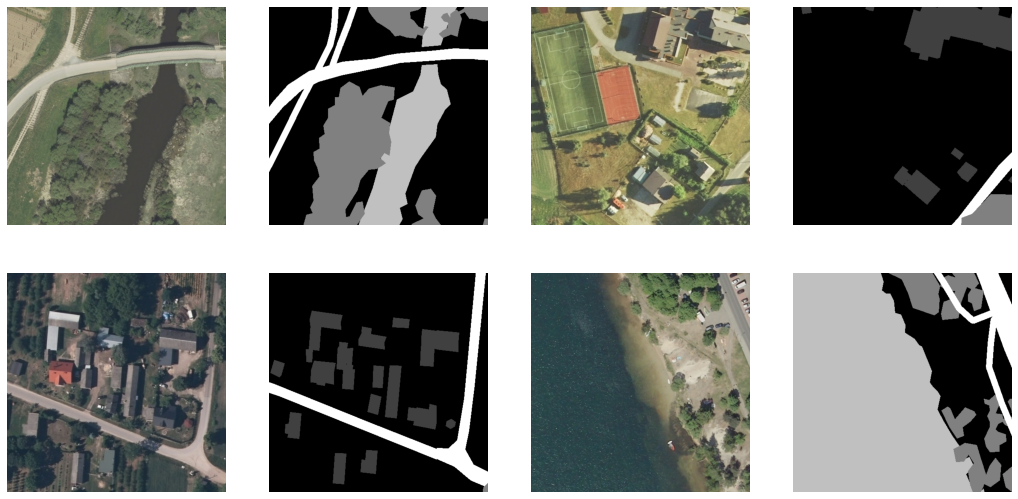

In [ ]:
#@title RGB Images and their Corresponding Binary Masks
# reqruite using sample images
dir = os.path.join(DRIVE_DIR, DATASET_DIR,'output')
img_1 = get_image_set('M-34-32-B-b-1-3_311')
img_2 = get_image_set('M-33-20-D-d-3-3_229')
img_3 = get_image_set('M-34-5-D-d-4-2_99')
img_4 = get_image_set('M-34-51-C-d-4-1_283')


fig, ax = plt.subplots(2, 4)
fig.set_size_inches(18,9)
ax[0][0].imshow(img_1[0])
ax[0][0].axis('off')
ax[0][1].imshow(img_1[1][:,:,0], cmap='gray')
ax[0][1].axis('off')
ax[0][2].imshow(img_2[0])
ax[0][2].axis('off')
ax[0][3].imshow(img_2[1][:,:,0], cmap='gray')
ax[0][3].axis('off')

ax[1][0].imshow(img_3[0])
ax[1][0].axis('off')
ax[1][1].imshow(img_3[1][:,:,0], cmap='gray')
ax[1][1].axis('off')
ax[1][2].imshow(img_4[0])
ax[1][2].axis('off')
ax[1][3].imshow(img_4[1][:,:,0], cmap='gray')
ax[1][3].axis('off')

plt.show()


# Data Augmentation



In [ ]:
import albumentations as A
import cv2

class Image_Generator(tf.keras.utils.Sequence):
  def __init__(self, _dir,img_list,l,split,train=False,batch_size=1):
        """
        @param dir: directory containing file lists and output dir
        @param img_list: file containing list of training images provided by dataset
        @param l: length of training/validation set, found on https://landcover.ai.linuxpolska.com/
        """
        self.dir = _dir
        self.l = l
        self.img_list = os.path.join(_dir,img_list)
        self.batch_size = batch_size
        # self.shuffle = shuffle
        self.train = train
        self._file = open(self.img_list)
        self.split = split

  def on_epoch_end(self):
        self._file.seek(0, 0)

  def __getitem__(self, index):

        transform = A.Compose([
          A.OneOf([
            A.RandomRotate90(p=1),
            A.HorizontalFlip(p=1),
            A.RandomSizedCrop(min_max_height=(248,512),height=512,width=512, p =1)
            ],
            p = 0.5),
          A.OneOf([
            A.HueSaturationValue(40,40,30,p=1),
            A.RandomBrightnessContrast(brightness_limit=0.2,contrast_limit=0.5,p=1),
            A.RandomShadow(p=1)
          ],p=0.5)
        ])



        features = []
        masks = []

        for i in range(self.batch_size):
          img = self._file.readline()
          jpgtensor = get_image(os.path.join(self.dir,'output','{}.jpg'.format(img.strip())),3).numpy()
          pngtensor = get_image(os.path.join(self.dir,'output','{}_m.png'.format(img.strip())),1).numpy()

          if self.train:
            transformed = transform(image=jpgtensor, mask=pngtensor)
            jpgtensor = transformed['image']
            pngtensor = transformed['mask']

          pngtensor = keras.utils.to_categorical(pngtensor,5)
          features.append(jpgtensor)
          masks.append(pngtensor)

        return np.array(features), np.array(masks)
  def __len__(self):
      return int(self.l * self.split)// self.batch_size

Defining training, validation, and demo datasets

In [ ]:
ds_train = Image_Generator(DATASET_DIR,'train.txt',7470,0.9,True)
ds_validation = Image_Generator(DATASET_DIR,'val.txt',1602,0.8)

In [ ]:
ds_augmentation_demo = Image_Generator(DATASET_DIR,'val.txt',1602,0.8)

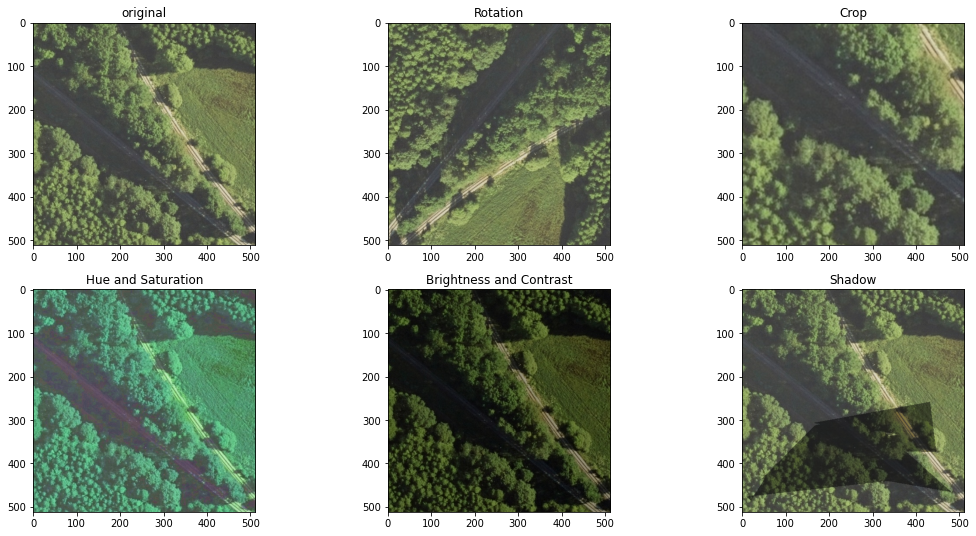

In [ ]:
#@title Original Image vs Augmented Variations
import albumentations as A


fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18,9)
titles = ['Rotation','Crop','Hue and Saturation','Brightness and Contrast','Shadow','Motion Blur']
augmentations = [A.RandomRotate90(p=1),A.RandomSizedCrop(min_max_height=(248,512),height=512,width=512, p =1), A.HueSaturationValue(40,40,30,p=1),A.RandomBrightnessContrast(brightness_limit=0.2,contrast_limit=0.5,p=1),  A.RandomShadow(p=1,num_shadows_lower=3, num_shadows_upper=5),A.MotionBlur(p=1,blur_limit=1)]
image = ds_augmentation_demo.__getitem__(0)[0]
for i,j,k in zip(ax.flat[1::],augmentations,titles):
  aug = A.Compose([j])(image=image[0])
  image_new = aug['image']
  i.set_title(k)
  # print(img)
  i.imshow(image_new)

ax[0][0].imshow(image[0])
ax[0][0].set_title("original")
plt.show()




## Defining Training and validation dataset


# Building U-Net

In [ ]:
def validate_input(input_shape,depth):
    if input_shape % 32 == 0: return (input_shape,input_shape,depth)
    raise Exception("input shape is invalid")

In [ ]:
def double_conv(x, n):
  x = Conv2D(filters=n, kernel_size = 3, padding='same', activation = 'relu',kernel_regularizer=tf.keras.regularizers.L2(1e-6))(x)
  x = Dropout(rate=0.2)(x)
  x = Conv2D(filters=n, kernel_size = 3, padding='same', activation = 'relu',kernel_regularizer=tf.keras.regularizers.L2(1e-6))(x)
  return x

In [ ]:
def build_UNet(INPUT_SHAPE,NUMBER_OF_CLASSES):
    # checks that input shape is divisible by 32
    inputs = keras.Input(shape=validate_input(INPUT_SHAPE,3))
    input_rescaled = Rescaling(1./255)(inputs)

    l1 = double_conv(input_rescaled,64)

    max_1 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(l1)

    l2 = double_conv(max_1,128)

    max_2 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(l2)

    l3 = double_conv(max_2,256)

    max_3 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(l3)

    l4 = double_conv(max_3,512)

    max_4 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(l4)

    l5 = double_conv(max_4,1024)

    # upconvolution

    up1 = Conv2DTranspose(filters=512, kernel_size = 2, strides=(2, 2), padding='same')(l5)
    up1 = concatenate(inputs=[up1,l4], axis=3)
    up1 = double_conv(up1,512)

    up2 = Conv2DTranspose(filters=256, kernel_size = 2, strides=(2, 2), padding='same')(up1)
    up2 = concatenate(inputs=[up2,l3], axis=3)
    up2 = double_conv(up2,256)

    up3 = Conv2DTranspose(filters=128, kernel_size = 2, strides=(2, 2), padding='same')(up2)
    up3 = concatenate(inputs=[up3,l2], axis=3)
    up3 = double_conv(up3,128)

    up4 = Conv2DTranspose(filters=64, kernel_size = 2, strides=(2, 2), padding='same')(up3)
    up4 = concatenate(inputs=[up4,l1], axis=3)
    up4 = double_conv(up4,64)

    outputs = Conv2D(filters=NUMBER_OF_CLASSES, kernel_size = 1, padding='same', activation = 'softmax')(up4)

    return keras.Model(inputs=inputs, outputs=outputs, name="UNET")



Unet variation with reduced complecity, roughly half the parameters, bottom set of convoltions are removed

In [ ]:
def build_reduced_UNet(INPUT_SHAPE,NUMBER_OF_CLASSES):

    # checks that input shape is divisible by 32
    inputs = keras.Input(shape=validate_input(INPUT_SHAPE,3))
    input_rescaled = Rescaling(1./255)(inputs)

    l1 = double_conv(input_rescaled,64)

    max_1 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(l1)

    l2 = double_conv(max_1,128)

    max_2 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(l2)

    l3 = double_conv(max_2,256)

    max_3 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(l3)

    l4 = double_conv(max_3,512)

    up1 = Conv2DTranspose(filters=256, kernel_size = 2, strides=(2, 2), padding='same')(l4)
    up1 = concatenate(inputs=[up1,l3], axis=3)
    up1 = double_conv(up1,256)

    up2 = Conv2DTranspose(filters=128, kernel_size = 2, strides=(2, 2), padding='same')(up1)
    up2 = concatenate(inputs=[up2,l2], axis=3)
    up2 = double_conv(up2,128)

    up3 = Conv2DTranspose(filters=64, kernel_size = 2, strides=(2, 2), padding='same')(up2)
    up3 = concatenate(inputs=[up3,l1], axis=3)
    up3 = double_conv(up3,64)

    outputs = Conv2D(filters=NUMBER_OF_CLASSES, kernel_size = 1, padding='same', activation = 'softmax')(up3)

    return keras.Model(inputs=inputs, outputs=outputs, name="UNET")

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 512, 512, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                               

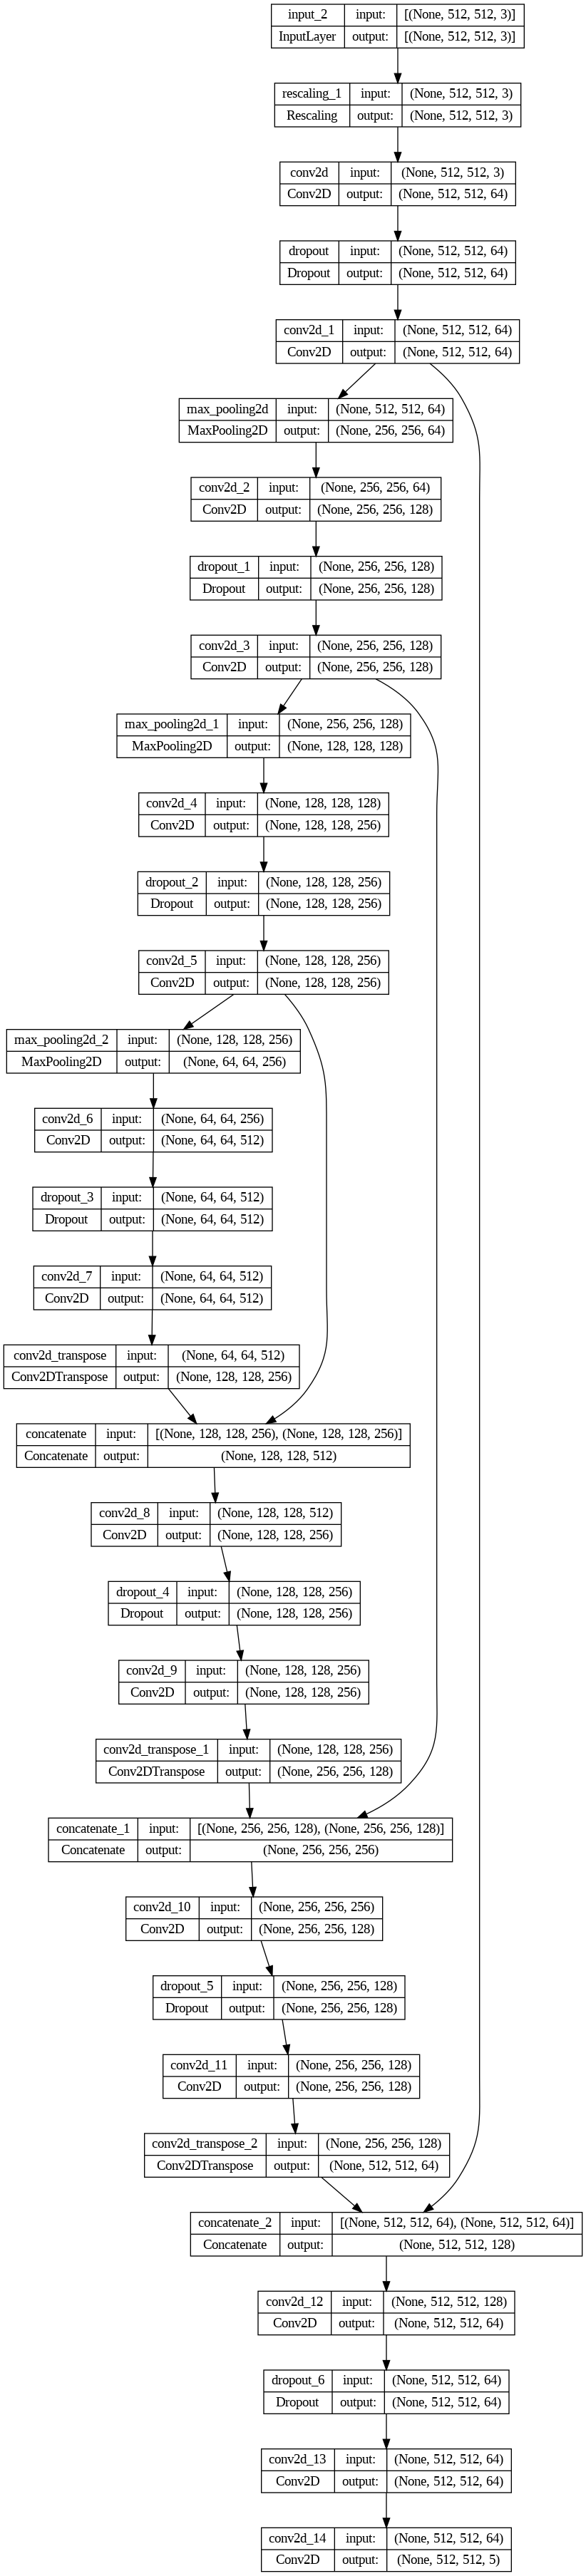

In [ ]:
UNet = build_reduced_UNet(512,5)

UNet.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy',tf.keras.metrics.MeanIoU(num_classes=5)]
)

UNet.summary()
tf.keras.utils.plot_model(UNet, to_file='Unet.png', show_shapes=True)

#Training

In [ ]:
Model_dir = os.path.join(DRIVE_DIR, 'full_model')
my_callbacks= [
    tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(Model_dir,'checkpoints'), verbose=1, save_weights_only=False,save_best_only=True)
]


In [ ]:
from keras import callbacks
UNet = build_UNet(512,5)

UNet.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.00015),
    metrics=['accuracy',tf.keras.metrics.OneHotMeanIoU(num_classes=5)]
)
history = UNet.fit(ds_train, batch_size=32,epochs=100, validation_data=ds_validation, callbacks=my_callbacks)

history_dict = history.history

Epoch 1/100
6723/6723 [==============================] - ETA: 0s - loss: 0.7070 - accuracy: 0.7287 - one_hot_mean_io_u: 0.2828
Epoch 1: val_loss improved from inf to 1.03407, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 287s 39ms/step - loss: 0.7070 - accuracy: 0.7287 - one_hot_mean_io_u: 0.2828 - val_loss: 1.0341 - val_accuracy: 0.6479 - val_one_hot_mean_io_u: 0.1756
Epoch 2/100
6722/6723 [============================>.] - ETA: 0s - loss: 0.6791 - accuracy: 0.7350 - one_hot_mean_io_u: 0.2865
Epoch 2: val_loss improved from 1.03407 to 1.02353, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 261s 39ms/step - loss: 0.6790 - accuracy: 0.7350 - one_hot_mean_io_u: 0.2865 - val_loss: 1.0235 - val_accuracy: 0.6449 - val_one_hot_mean_io_u: 0.1773
Epoch 3/100
6723/6723 [==============================] - ETA: 0s - loss: 0.6607 - accuracy: 0.7435 - one_hot_mean_io_u: 0.2962
Epoch 3: val_loss improved from 1.02353 to 1.01020, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 260s 39ms/step - loss: 0.6607 - accuracy: 0.7435 - one_hot_mean_io_u: 0.2962 - val_loss: 1.0102 - val_accuracy: 0.6466 - val_one_hot_mean_io_u: 0.1815
Epoch 4/100
6723/6723 [==============================] - ETA: 0s - loss: 0.6304 - accuracy: 0.7532 - one_hot_mean_io_u: 0.3157
Epoch 4: val_loss did not improve from 1.01020
6723/6723 [==============================] - 253s 38ms/step - loss: 0.6304 - accuracy: 0.7532 - one_hot_mean_io_u: 0.3157 - val_loss: 1.0258 - val_accuracy: 0.6375 - val_one_hot_mean_io_u: 0.1721
Epoch 5/100
6723/6723 [==============================] - ETA: 0s - loss: 0.6006 - accuracy: 0.7695 - one_hot_mean_io_u: 0.3381
Epoch 5: val_loss did not improve from 1.01020
6723/6723 [==============================] - 253s 38ms/step - loss: 0.6006 - accuracy: 0.7695 - one_hot_mean_io_u: 0.3381 - val_loss: 1.0231 - val_accuracy: 0.6745 - val_one_hot_mean_io_u: 0.2006
Epoch 6/100
6723/6723 [==============================] - ETA: 0s

6723/6723 [==============================] - 260s 39ms/step - loss: 0.5067 - accuracy: 0.8075 - one_hot_mean_io_u: 0.3905 - val_loss: 0.9150 - val_accuracy: 0.7433 - val_one_hot_mean_io_u: 0.2749
Epoch 9/100
6722/6723 [============================>.] - ETA: 0s - loss: 0.4731 - accuracy: 0.8244 - one_hot_mean_io_u: 0.4160
Epoch 9: val_loss did not improve from 0.91498
6723/6723 [==============================] - 253s 38ms/step - loss: 0.4731 - accuracy: 0.8244 - one_hot_mean_io_u: 0.4160 - val_loss: 0.9350 - val_accuracy: 0.7205 - val_one_hot_mean_io_u: 0.2302
Epoch 10/100
6723/6723 [==============================] - ETA: 0s - loss: 0.4522 - accuracy: 0.8333 - one_hot_mean_io_u: 0.4303
Epoch 10: val_loss did not improve from 0.91498
6723/6723 [==============================] - 254s 38ms/step - loss: 0.4522 - accuracy: 0.8333 - one_hot_mean_io_u: 0.4303 - val_loss: 1.0102 - val_accuracy: 0.7376 - val_one_hot_mean_io_u: 0.2912
Epoch 11/100
6723/6723 [==============================] - ETA:

6723/6723 [==============================] - 260s 39ms/step - loss: 0.4308 - accuracy: 0.8422 - one_hot_mean_io_u: 0.4413 - val_loss: 0.7995 - val_accuracy: 0.7613 - val_one_hot_mean_io_u: 0.2870
Epoch 12/100
6723/6723 [==============================] - ETA: 0s - loss: 0.4042 - accuracy: 0.8517 - one_hot_mean_io_u: 0.4667
Epoch 12: val_loss did not improve from 0.79946
6723/6723 [==============================] - 253s 38ms/step - loss: 0.4042 - accuracy: 0.8517 - one_hot_mean_io_u: 0.4667 - val_loss: 0.8035 - val_accuracy: 0.7508 - val_one_hot_mean_io_u: 0.3068
Epoch 13/100
6723/6723 [==============================] - ETA: 0s - loss: 0.3893 - accuracy: 0.8591 - one_hot_mean_io_u: 0.4836
Epoch 13: val_loss did not improve from 0.79946
6723/6723 [==============================] - 254s 38ms/step - loss: 0.3893 - accuracy: 0.8591 - one_hot_mean_io_u: 0.4836 - val_loss: 0.8267 - val_accuracy: 0.7388 - val_one_hot_mean_io_u: 0.3293
Epoch 14/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 261s 39ms/step - loss: 0.3729 - accuracy: 0.8645 - one_hot_mean_io_u: 0.5064 - val_loss: 0.7243 - val_accuracy: 0.7615 - val_one_hot_mean_io_u: 0.3657
Epoch 16/100
6722/6723 [============================>.] - ETA: 0s - loss: 0.3601 - accuracy: 0.8706 - one_hot_mean_io_u: 0.5204
Epoch 16: val_loss improved from 0.72432 to 0.70636, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 261s 39ms/step - loss: 0.3601 - accuracy: 0.8706 - one_hot_mean_io_u: 0.5204 - val_loss: 0.7064 - val_accuracy: 0.7763 - val_one_hot_mean_io_u: 0.3912
Epoch 17/100
6723/6723 [==============================] - ETA: 0s - loss: 0.3443 - accuracy: 0.8761 - one_hot_mean_io_u: 0.5374
Epoch 17: val_loss did not improve from 0.70636
6723/6723 [==============================] - 255s 38ms/step - loss: 0.3443 - accuracy: 0.8761 - one_hot_mean_io_u: 0.5374 - val_loss: 0.7281 - val_accuracy: 0.7848 - val_one_hot_mean_io_u: 0.3913
Epoch 18/100
6723/6723 [==============================] - ETA: 0s - loss: 0.3413 - accuracy: 0.8772 - one_hot_mean_io_u: 0.5443
Epoch 18: val_loss did not improve from 0.70636
6723/6723 [==============================] - 255s 38ms/step - loss: 0.3413 - accuracy: 0.8772 - one_hot_mean_io_u: 0.5443 - val_loss: 0.7578 - val_accuracy: 0.7716 - val_one_hot_mean_io_u: 0.3869
Epoch 19/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 262s 39ms/step - loss: 0.3286 - accuracy: 0.8827 - one_hot_mean_io_u: 0.5578 - val_loss: 0.6693 - val_accuracy: 0.7942 - val_one_hot_mean_io_u: 0.4077
Epoch 20/100
6723/6723 [==============================] - ETA: 0s - loss: 0.3114 - accuracy: 0.8885 - one_hot_mean_io_u: 0.5767
Epoch 20: val_loss did not improve from 0.66933
6723/6723 [==============================] - 255s 38ms/step - loss: 0.3114 - accuracy: 0.8885 - one_hot_mean_io_u: 0.5767 - val_loss: 0.6718 - val_accuracy: 0.7937 - val_one_hot_mean_io_u: 0.4058
Epoch 21/100
6723/6723 [==============================] - ETA: 0s - loss: 0.3233 - accuracy: 0.8839 - one_hot_mean_io_u: 0.5678
Epoch 21: val_loss did not improve from 0.66933
6723/6723 [==============================] - 252s 37ms/step - loss: 0.3233 - accuracy: 0.8839 - one_hot_mean_io_u: 0.5678 - val_loss: 0.7381 - val_accuracy: 0.7845 - val_one_hot_mean_io_u: 0.4147
Epoch 22/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 256s 38ms/step - loss: 0.3121 - accuracy: 0.8884 - one_hot_mean_io_u: 0.5703 - val_loss: 0.6352 - val_accuracy: 0.8190 - val_one_hot_mean_io_u: 0.4527
Epoch 24/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2993 - accuracy: 0.8924 - one_hot_mean_io_u: 0.5906
Epoch 24: val_loss did not improve from 0.63524
6723/6723 [==============================] - 250s 37ms/step - loss: 0.2993 - accuracy: 0.8924 - one_hot_mean_io_u: 0.5906 - val_loss: 0.7534 - val_accuracy: 0.7792 - val_one_hot_mean_io_u: 0.4105
Epoch 25/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.8939 - one_hot_mean_io_u: 0.6000
Epoch 25: val_loss did not improve from 0.63524
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2960 - accuracy: 0.8939 - one_hot_mean_io_u: 0.6000 - val_loss: 0.7209 - val_accuracy: 0.7913 - val_one_hot_mean_io_u: 0.4429
Epoch 26/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 255s 38ms/step - loss: 0.2866 - accuracy: 0.8966 - one_hot_mean_io_u: 0.6104 - val_loss: 0.6143 - val_accuracy: 0.8157 - val_one_hot_mean_io_u: 0.4606
Epoch 28/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.8992 - one_hot_mean_io_u: 0.6124
Epoch 28: val_loss did not improve from 0.61433
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2812 - accuracy: 0.8992 - one_hot_mean_io_u: 0.6124 - val_loss: 0.6554 - val_accuracy: 0.8081 - val_one_hot_mean_io_u: 0.4574
Epoch 29/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2837 - accuracy: 0.8990 - one_hot_mean_io_u: 0.6183
Epoch 29: val_loss did not improve from 0.61433
6723/6723 [==============================] - 250s 37ms/step - loss: 0.2837 - accuracy: 0.8990 - one_hot_mean_io_u: 0.6183 - val_loss: 0.6517 - val_accuracy: 0.8169 - val_one_hot_mean_io_u: 0.4669
Epoch 30/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 254s 38ms/step - loss: 0.2784 - accuracy: 0.8998 - one_hot_mean_io_u: 0.6173 - val_loss: 0.6120 - val_accuracy: 0.8290 - val_one_hot_mean_io_u: 0.4724
Epoch 31/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.8996 - one_hot_mean_io_u: 0.6168
Epoch 31: val_loss did not improve from 0.61202
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2816 - accuracy: 0.8996 - one_hot_mean_io_u: 0.6168 - val_loss: 0.6209 - val_accuracy: 0.8053 - val_one_hot_mean_io_u: 0.4327
Epoch 32/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2766 - accuracy: 0.9011 - one_hot_mean_io_u: 0.6258
Epoch 32: val_loss did not improve from 0.61202
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2766 - accuracy: 0.9011 - one_hot_mean_io_u: 0.6258 - val_loss: 0.6688 - val_accuracy: 0.8174 - val_one_hot_mean_io_u: 0.4555
Epoch 33/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 255s 38ms/step - loss: 0.2750 - accuracy: 0.9021 - one_hot_mean_io_u: 0.6243 - val_loss: 0.5929 - val_accuracy: 0.8245 - val_one_hot_mean_io_u: 0.4961
Epoch 35/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2742 - accuracy: 0.9021 - one_hot_mean_io_u: 0.6270
Epoch 35: val_loss did not improve from 0.59295
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2742 - accuracy: 0.9021 - one_hot_mean_io_u: 0.6270 - val_loss: 0.6369 - val_accuracy: 0.8281 - val_one_hot_mean_io_u: 0.4784
Epoch 36/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2755 - accuracy: 0.9017 - one_hot_mean_io_u: 0.6194
Epoch 36: val_loss did not improve from 0.59295
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2755 - accuracy: 0.9017 - one_hot_mean_io_u: 0.6194 - val_loss: 0.6372 - val_accuracy: 0.8219 - val_one_hot_mean_io_u: 0.4554
Epoch 37/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 255s 38ms/step - loss: 0.2579 - accuracy: 0.9081 - one_hot_mean_io_u: 0.6456 - val_loss: 0.5897 - val_accuracy: 0.8238 - val_one_hot_mean_io_u: 0.4872
Epoch 46/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2587 - accuracy: 0.9079 - one_hot_mean_io_u: 0.6511
Epoch 46: val_loss did not improve from 0.58968
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2587 - accuracy: 0.9079 - one_hot_mean_io_u: 0.6511 - val_loss: 0.5949 - val_accuracy: 0.8308 - val_one_hot_mean_io_u: 0.4356
Epoch 47/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2656 - accuracy: 0.9063 - one_hot_mean_io_u: 0.6470
Epoch 47: val_loss improved from 0.58968 to 0.58961, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 255s 38ms/step - loss: 0.2656 - accuracy: 0.9063 - one_hot_mean_io_u: 0.6470 - val_loss: 0.5896 - val_accuracy: 0.8365 - val_one_hot_mean_io_u: 0.5141
Epoch 48/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.9078 - one_hot_mean_io_u: 0.6503
Epoch 48: val_loss improved from 0.58961 to 0.51221, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 255s 38ms/step - loss: 0.2573 - accuracy: 0.9078 - one_hot_mean_io_u: 0.6503 - val_loss: 0.5122 - val_accuracy: 0.8093 - val_one_hot_mean_io_u: 0.5107
Epoch 49/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2551 - accuracy: 0.9093 - one_hot_mean_io_u: 0.6555
Epoch 49: val_loss did not improve from 0.51221
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2551 - accuracy: 0.9093 - one_hot_mean_io_u: 0.6555 - val_loss: 0.6642 - val_accuracy: 0.8147 - val_one_hot_mean_io_u: 0.4891
Epoch 50/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.9084 - one_hot_mean_io_u: 0.6497
Epoch 50: val_loss did not improve from 0.51221
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2559 - accuracy: 0.9084 - one_hot_mean_io_u: 0.6497 - val_loss: 0.5489 - val_accuracy: 0.8296 - val_one_hot_mean_io_u: 0.5111
Epoch 51/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 256s 38ms/step - loss: 0.2492 - accuracy: 0.9112 - one_hot_mean_io_u: 0.6670 - val_loss: 0.5027 - val_accuracy: 0.8335 - val_one_hot_mean_io_u: 0.5440
Epoch 61/100
6722/6723 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.9117 - one_hot_mean_io_u: 0.6628
Epoch 61: val_loss did not improve from 0.50274
6723/6723 [==============================] - 250s 37ms/step - loss: 0.2513 - accuracy: 0.9117 - one_hot_mean_io_u: 0.6628 - val_loss: 0.5465 - val_accuracy: 0.8446 - val_one_hot_mean_io_u: 0.5547
Epoch 62/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2465 - accuracy: 0.9115 - one_hot_mean_io_u: 0.6680
Epoch 62: val_loss did not improve from 0.50274
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2465 - accuracy: 0.9115 - one_hot_mean_io_u: 0.6680 - val_loss: 0.6059 - val_accuracy: 0.8337 - val_one_hot_mean_io_u: 0.4866
Epoch 63/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 256s 38ms/step - loss: 0.2408 - accuracy: 0.9137 - one_hot_mean_io_u: 0.6782 - val_loss: 0.4877 - val_accuracy: 0.8496 - val_one_hot_mean_io_u: 0.5625
Epoch 74/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2400 - accuracy: 0.9144 - one_hot_mean_io_u: 0.6760
Epoch 74: val_loss did not improve from 0.48768
6723/6723 [==============================] - 250s 37ms/step - loss: 0.2400 - accuracy: 0.9144 - one_hot_mean_io_u: 0.6760 - val_loss: 0.6103 - val_accuracy: 0.8257 - val_one_hot_mean_io_u: 0.5417
Epoch 75/100
6722/6723 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.9140 - one_hot_mean_io_u: 0.6790
Epoch 75: val_loss did not improve from 0.48768
6723/6723 [==============================] - 251s 37ms/step - loss: 0.2417 - accuracy: 0.9141 - one_hot_mean_io_u: 0.6790 - val_loss: 0.5453 - val_accuracy: 0.8417 - val_one_hot_mean_io_u: 0.5423
Epoch 76/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 258s 38ms/step - loss: 0.2384 - accuracy: 0.9148 - one_hot_mean_io_u: 0.6811 - val_loss: 0.4804 - val_accuracy: 0.8554 - val_one_hot_mean_io_u: 0.5763
Epoch 77/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2373 - accuracy: 0.9157 - one_hot_mean_io_u: 0.6783
Epoch 77: val_loss did not improve from 0.48035
6723/6723 [==============================] - 251s 37ms/step - loss: 0.2373 - accuracy: 0.9157 - one_hot_mean_io_u: 0.6783 - val_loss: 1.1999 - val_accuracy: 0.8423 - val_one_hot_mean_io_u: 0.5037
Epoch 78/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2433 - accuracy: 0.9134 - one_hot_mean_io_u: 0.6774
Epoch 78: val_loss did not improve from 0.48035
6723/6723 [==============================] - 250s 37ms/step - loss: 0.2433 - accuracy: 0.9134 - one_hot_mean_io_u: 0.6774 - val_loss: 0.5245 - val_accuracy: 0.8326 - val_one_hot_mean_io_u: 0.5164
Epoch 79/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 255s 38ms/step - loss: 0.2357 - accuracy: 0.9167 - one_hot_mean_io_u: 0.6831 - val_loss: 0.4708 - val_accuracy: 0.8592 - val_one_hot_mean_io_u: 0.5784
Epoch 83/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2395 - accuracy: 0.9147 - one_hot_mean_io_u: 0.6792
Epoch 83: val_loss did not improve from 0.47082
6723/6723 [==============================] - 250s 37ms/step - loss: 0.2395 - accuracy: 0.9147 - one_hot_mean_io_u: 0.6792 - val_loss: 0.4955 - val_accuracy: 0.8329 - val_one_hot_mean_io_u: 0.5574
Epoch 84/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.9159 - one_hot_mean_io_u: 0.6818
Epoch 84: val_loss did not improve from 0.47082
6723/6723 [==============================] - 253s 38ms/step - loss: 0.2369 - accuracy: 0.9159 - one_hot_mean_io_u: 0.6818 - val_loss: 0.4807 - val_accuracy: 0.8595 - val_one_hot_mean_io_u: 0.5860
Epoch 85/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 257s 38ms/step - loss: 0.2448 - accuracy: 0.9142 - one_hot_mean_io_u: 0.6756 - val_loss: 0.4634 - val_accuracy: 0.8383 - val_one_hot_mean_io_u: 0.5244
Epoch 86/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2348 - accuracy: 0.9171 - one_hot_mean_io_u: 0.6862
Epoch 86: val_loss improved from 0.46344 to 0.44838, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 258s 38ms/step - loss: 0.2348 - accuracy: 0.9171 - one_hot_mean_io_u: 0.6862 - val_loss: 0.4484 - val_accuracy: 0.8560 - val_one_hot_mean_io_u: 0.5759
Epoch 87/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2376 - accuracy: 0.9157 - one_hot_mean_io_u: 0.6803
Epoch 87: val_loss did not improve from 0.44838
6723/6723 [==============================] - 252s 37ms/step - loss: 0.2376 - accuracy: 0.9157 - one_hot_mean_io_u: 0.6803 - val_loss: 0.4594 - val_accuracy: 0.8466 - val_one_hot_mean_io_u: 0.5489
Epoch 88/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.9177 - one_hot_mean_io_u: 0.6861
Epoch 88: val_loss did not improve from 0.44838
6723/6723 [==============================] - 252s 38ms/step - loss: 0.2325 - accuracy: 0.9177 - one_hot_mean_io_u: 0.6861 - val_loss: 0.5486 - val_accuracy: 0.8335 - val_one_hot_mean_io_u: 0.5515
Epoch 89/100
6723/6723 [==============================] - ET

6723/6723 [==============================] - 256s 38ms/step - loss: 0.2323 - accuracy: 0.9178 - one_hot_mean_io_u: 0.6872 - val_loss: 0.4450 - val_accuracy: 0.8561 - val_one_hot_mean_io_u: 0.5886
Epoch 93/100
6722/6723 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.9167 - one_hot_mean_io_u: 0.6850
Epoch 93: val_loss improved from 0.44500 to 0.41953, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 256s 38ms/step - loss: 0.2352 - accuracy: 0.9167 - one_hot_mean_io_u: 0.6851 - val_loss: 0.4195 - val_accuracy: 0.8544 - val_one_hot_mean_io_u: 0.5886
Epoch 94/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2338 - accuracy: 0.9171 - one_hot_mean_io_u: 0.6829
Epoch 94: val_loss did not improve from 0.41953
6723/6723 [==============================] - 249s 37ms/step - loss: 0.2338 - accuracy: 0.9171 - one_hot_mean_io_u: 0.6829 - val_loss: 0.4679 - val_accuracy: 0.8557 - val_one_hot_mean_io_u: 0.5888
Epoch 95/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2356 - accuracy: 0.9166 - one_hot_mean_io_u: 0.6827
Epoch 95: val_loss improved from 0.41953 to 0.40234, saving model to drive/MyDrive/full_model/checkpoints


6723/6723 [==============================] - 254s 38ms/step - loss: 0.2356 - accuracy: 0.9166 - one_hot_mean_io_u: 0.6827 - val_loss: 0.4023 - val_accuracy: 0.8727 - val_one_hot_mean_io_u: 0.6162
Epoch 96/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2333 - accuracy: 0.9171 - one_hot_mean_io_u: 0.6860
Epoch 96: val_loss did not improve from 0.40234
6723/6723 [==============================] - 246s 37ms/step - loss: 0.2333 - accuracy: 0.9171 - one_hot_mean_io_u: 0.6860 - val_loss: 0.4402 - val_accuracy: 0.8601 - val_one_hot_mean_io_u: 0.5899
Epoch 97/100
6723/6723 [==============================] - ETA: 0s - loss: 0.2330 - accuracy: 0.9179 - one_hot_mean_io_u: 0.6852
Epoch 97: val_loss did not improve from 0.40234
6723/6723 [==============================] - 246s 37ms/step - loss: 0.2330 - accuracy: 0.9179 - one_hot_mean_io_u: 0.6852 - val_loss: 0.5099 - val_accuracy: 0.8416 - val_one_hot_mean_io_u: 0.5232
Epoch 98/100
6723/6723 [==============================] - ET

In [ ]:
plt.plot(history_dict['loss'],label='loss')
plt.plot(history_dict['val_loss'], label = 'validation loss')

plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend()
plt.title('loss over time')

In [ ]:
UNet1 = build_UNet(512,5)
Model_dir = os.path.join(DRIVE_DIR,'Models')

UNet1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy',tf.keras.metrics.OneHotMeanIoU(num_classes=5)]
)

history1 = UNet1.fit(ds_train, batch_size=32,epochs=100, validation_data=ds_validation, callbacks = my_callbacks)
UNet1.save_weights(os.path.join(DRIVE_DIR,'Models'))
history_dict = history1.history
json.dump(history_dict,open(os.path.join(DRIVE_DIR,'models/history_1','w')))

In [ ]:
UNet2 = build_UNet(512,5)
Model_dir = os.path.join(DRIVE_DIR,'Models')

UNet2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.00005),
    metrics=['accuracy',tf.keras.metrics.OneHotMeanIoU(num_classes=5)]
)

history2 = UNet2.fit(ds_train, batch_size=32,epochs=100, validation_data=ds_validation, callbacks = my_callbacks)

history_dict = history2.history

# Saving model and Converting to tflite

In [ ]:
UNet.save('./model1/weights')

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(UNet0)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)